In [ ]:
# from tensorflow.keras.applications.vgg16 import VGG16 ,decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
from sklearn.preprocessing import LabelEncoder
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, Activation, Add, Input, ZeroPadding2D, AveragePooling2D

# **Pretrained ResNet50**

In [ ]:
model = ResNet50()

In [ ]:
def resnet50(img_path):
  img = cv2.imread(img_path)
  img = cv2.resize(img, (224,224))
  img = np.array(img)
  display_image = Image.fromarray(img)
  img = preprocess_input(img)
  img = img.reshape(1,224,224,3)
  prediction = model.predict(img)
  output = decode_predictions(prediction)[0]
  plt.imshow(display_image)

  return f'Predicted: {output}'

"Predicted: [('n01616318', 'vulture', 0.6436883), ('n01608432', 'kite', 0.12504962), ('n01829413', 'hornbill', 0.087971985), ('n02002724', 'black_stork', 0.038252063), ('n02002556', 'white_stork', 0.023985427)]"

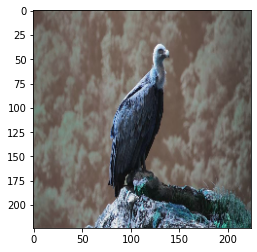

In [ ]:
resnet50('/content/vulture.jpg')

"Predicted: [('n04033995', 'quilt', 0.5081582), ('n01737021', 'water_snake', 0.14311871), ('n01729322', 'hognose_snake', 0.046916727), ('n03976657', 'pole', 0.041548632), ('n01751748', 'sea_snake', 0.038406897)]"

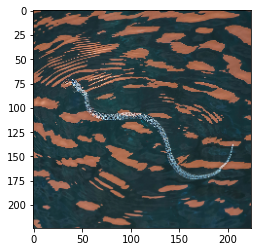

In [ ]:
resnet50('/content/Viperine_water_snake_(Natrix_maura).jpg')

"Predicted: [('n02092002', 'Scottish_deerhound', 0.9053642), ('n02090721', 'Irish_wolfhound', 0.09169589), ('n02105251', 'briard', 0.0018286373), ('n02088094', 'Afghan_hound', 0.00034862896), ('n02093991', 'Irish_terrier', 0.00030061408)]"

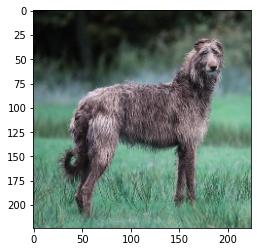

In [ ]:
resnet50('/content/7cd0f2c7ab32785095bfe7375cb0d869--scottish-deerhound-scotland.jpg')

"Predicted: [('n02454379', 'armadillo', 0.98527133), ('n02077923', 'sea_lion', 0.002533049), ('n01748264', 'Indian_cobra', 0.0016427235), ('n01797886', 'ruffed_grouse', 0.001545977), ('n01824575', 'coucal', 0.00108653)]"

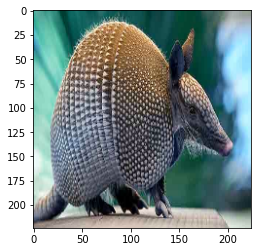

In [ ]:
resnet50('/content/mammal_nine-banded-armadillo_600x300.jpg')

"Predicted: [('n02277742', 'ringlet', 0.68809205), ('n02281787', 'lycaenid', 0.31154007), ('n02276258', 'admiral', 0.00034527463), ('n02280649', 'cabbage_butterfly', 1.2062249e-05), ('n02281406', 'sulphur_butterfly', 6.92093e-06)]"

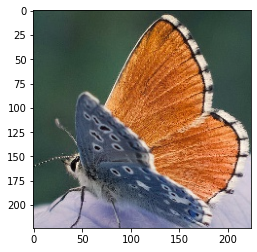

In [ ]:
resnet50('/content/2.jpg')

"Predicted: [('n02281787', 'lycaenid', 0.79352844), ('n02277742', 'ringlet', 0.20503403), ('n02281406', 'sulphur_butterfly', 0.0012422701), ('n02276258', 'admiral', 9.418127e-05), ('n02280649', 'cabbage_butterfly', 8.141037e-05)]"

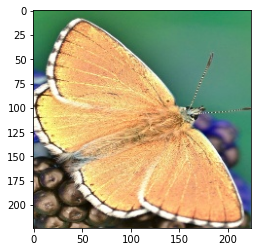

In [ ]:
resnet50('/content/4.jpg')

# **Butterfly Dataset Custom Training ResNet50**

In [ ]:
import os

In [ ]:
os.listdir('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly')

['CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'class_dict.csv',
 'butterflies.csv',
 'archive (1).zip',
 'train',
 'valid',
 '6 images',
 'test',
 'saved_weights',
 '.ipynb_checkpoints']

In [ ]:
# os.listdir('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/train')

In [ ]:
# os.listdir('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/train/SOUTHERN DOGFACE')

In [ ]:
# base_path = '/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/train/'

def preprocess(base_path):
  image_paths = []
  labels_lst = []
  labels = os.listdir(base_path) 
  for i in labels:
    filenames = os.listdir(base_path + i)
    
    for j in filenames:
      path = base_path + i + '/' + j
      labels_lst.append(i)
      image_paths.append(path)

  df = pd.DataFrame({'image_path':image_paths, 'labels':labels_lst})

  return df

In [ ]:
df_train = preprocess('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/train/')
df_test = preprocess('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/test/')
df_valid = preprocess('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/valid/')

In [ ]:
df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)
df_valid = df_valid.sample(frac=1)

In [ ]:
le = LabelEncoder()

In [ ]:
df_train['labels'] = le.fit_transform(df_train['labels'])
df_test['labels'] = le.fit_transform(df_test['labels'])
df_valid['labels'] = le.fit_transform(df_valid['labels'])

In [ ]:
# df_train['labels'].value_counts()

In [ ]:
df_test.shape

(375, 2)

In [ ]:
def images(df):
  images = []
  for i in df['image_path']:
    img = cv2.imread(i)
    img = cv2.resize(img, (224,224))
    images.append(img)

  return images

In [ ]:
x_test = images(df_test)
x_test = np.array(x_test)

In [ ]:

x_valid = images(df_valid)
x_valid = np.array(x_valid)

In [ ]:
x_train = images(df_train)
x_train = np.array(x_train)

In [ ]:
x_train.shape

(9285, 224, 224, 3)

In [ ]:
y_train = df_train['labels'].values
y_test = df_test['labels'].values
y_valid = df_valid['labels'].values

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystopping = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                                           verbose=1, min_lr=0.00001)

callbacks = [earlystopping, learning_rate_reduction]

# **Transfer Learning**

In [ ]:
resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=75,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(75, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 75)                38475     
                                                                 
Total params: 24,675,275
Trainable params: 1,087,563
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

In [ ]:
history = resnet_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=128, callbacks=callbacks)

Epoch 1/100
73/73 [==============================] - 44s 402ms/step - loss: 1.3400 - accuracy: 0.6735 - val_loss: 0.5148 - val_accuracy: 0.8681 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 26s 356ms/step - loss: 0.3496 - accuracy: 0.9044 - val_loss: 0.3515 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 27s 370ms/step - loss: 0.2058 - accuracy: 0.9418 - val_loss: 0.3052 - val_accuracy: 0.9077 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 28s 388ms/step - loss: 0.1242 - accuracy: 0.9679 - val_loss: 0.2612 - val_accuracy: 0.9393 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 29s 400ms/step - loss: 0.0797 - accuracy: 0.9810 - val_loss: 0.2300 - val_accuracy: 0.9420 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 28s 387ms/step - loss: 0.0553 - accuracy: 0.9874 - val_loss: 0.2287 - val_accuracy: 0.9420 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - 28s 3

In [ ]:
cd /content/drive/MyDrive/75 Butterfly Species/75 Butterfly/saved_weights

/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/saved_weights


In [ ]:
resnet_model.save('transfer_resnet50_model.h5')
resnet_model.save_weights('transfer_resnet50_model2.h5')

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json

In [ ]:
model_json = resnet_model.to_json()
with open("_transfer_resnet50_model3.json", "w") as json_file:
    json_file.write(model_json)

# **Custome Training**

In [ ]:
def identity_block(X, filters):

  F1, F2, F3 = filters


  X_shortcut = X

  X = Conv2D(filters = F1, kernel_size=1, strides=1, padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F1, kernel_size=3, strides=1, padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F1, kernel_size=1, strides=1, padding='valid')(X)
  X = BatchNormalization(axis=3)(X)


  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

In [ ]:
def convolution_block(X, filters):

  F1, F2, F3 = filters


  X_shortcut = X

  X = Conv2D(filters = F1, kernel_size=1, strides=2, padding='valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F1, kernel_size=3, strides=1, padding='same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(filters = F1, kernel_size=1, strides=1, padding='valid')(X)
  X = BatchNormalization(axis=3)(X)


  X_shortcut = Conv2D(filters = F1, kernel_size=1, strides=2, padding='valid')(X_shortcut)
  X_shortcut = BatchNormalization(axis=3)(X_shortcut)


  X = Add()([X, X_shortcut])
  X = Activation('relu')(X)

  return X

In [ ]:
def resNet50(input_shape=(224,224,3)):
  X_input = Input(input_shape)

  X = ZeroPadding2D(3)(X_input)

  X = Conv2D(filters=64, kernel_size=7, strides=2)(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D(pool_size=3, strides=2)(X)

  X = convolution_block(X, filters=[64,64,256])
  X = identity_block(X, filters=[64,64,256])
  X = identity_block(X, filters=[64,64,256])

  X = convolution_block(X, filters=[128,128,512])
  X = identity_block(X, filters=[128,128,512])
  X = identity_block(X, filters=[128,128,512])
  X = identity_block(X, filters=[128,128,512])

  X = convolution_block(X, filters=[256,256,1024])
  X = identity_block(X, filters=[256,256,1024])
  X = identity_block(X, filters=[256,256,1024])
  X = identity_block(X, filters=[256,256,1024])
  X = identity_block(X, filters=[256,256,1024])
  X = identity_block(X, filters=[256,256,1024])

  X = convolution_block(X, filters=[512,512,2048])
  X = identity_block(X, filters=[512,512,2048])
  X = identity_block(X, filters=[512,512,2048])

  X = AveragePooling2D(pool_size=2, padding='same')(X)


  X = Flatten()(X)
  X = Dense(512, activation='relu')(X)
  X = Dense(75, activation='softmax')(X)



  model = Model(inputs = X_input, outputs=X)

  return model

In [ ]:
model = resNet50()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=128, callbacks=callbacks)

Epoch 1/100
73/73 [==============================] - 55s 695ms/step - loss: 4.4536 - accuracy: 0.0412 - val_loss: 6.0992 - val_accuracy: 0.0264 - lr: 0.0010
Epoch 2/100
73/73 [==============================] - 18s 240ms/step - loss: 3.3157 - accuracy: 0.1641 - val_loss: 3.1962 - val_accuracy: 0.1741 - lr: 0.0010
Epoch 3/100
73/73 [==============================] - 18s 245ms/step - loss: 2.3045 - accuracy: 0.3647 - val_loss: 2.6481 - val_accuracy: 0.3166 - lr: 0.0010
Epoch 4/100
73/73 [==============================] - 17s 239ms/step - loss: 1.7073 - accuracy: 0.5131 - val_loss: 7.2655 - val_accuracy: 0.1662 - lr: 0.0010
Epoch 5/100
73/73 [==============================] - 17s 239ms/step - loss: 1.2257 - accuracy: 0.6388 - val_loss: 1.8111 - val_accuracy: 0.5013 - lr: 0.0010
Epoch 6/100
73/73 [==============================] - 17s 238ms/step - loss: 0.9364 - accuracy: 0.7152 - val_loss: 2.4687 - val_accuracy: 0.4090 - lr: 0.0010
Epoch 7/100
73/73 [==============================] - ETA: 

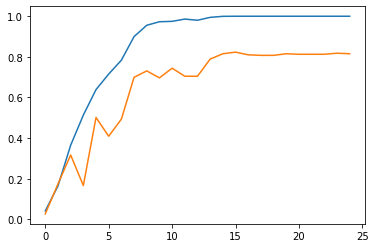

In [ ]:
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(25)
plt.plot(epochs, acc)
plt.plot(epochs, val)

plt.show()

In [ ]:
model.save('custom_extradense512_resnet50_model.h5')
model.save_weights('custom_extradense512_resnet50_model2.h5')

In [ ]:
model_json = model.to_json()
with open("custom_extradense512_resnet50_model3.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/75 Butterfly Species/75 Butterfly/saved_weights/custom_resnet50_model.h5')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_106 (Conv2D)            (None, 112, 112, 64  9472        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

57

In [ ]:
df_test

,image_path,labels
112,/content/drive/MyDrive/75 Butterfly Species/75...,57
340,/content/drive/MyDrive/75 Butterfly Species/75...,7
310,/content/drive/MyDrive/75 Butterfly Species/75...,12
89,/content/drive/MyDrive/75 Butterfly Species/75...,52
272,/content/drive/MyDrive/75 Butterfly Species/75...,19
...,...,...
14,/content/drive/MyDrive/75 Butterfly Species/75...,74
177,/content/drive/MyDrive/75 Butterfly Species/75...,40
207,/content/drive/MyDrive/75 Butterfly Species/75...,33
7,/content/drive/MyDrive/75 Butterfly Species/75...,73


In [ ]:
le.inverse_transform([1])

array(['AFRICAN GIANT SWALLOWTAIL'], dtype=object)

In [ ]:
x_test.shape

(375, 224, 224, 3)

Actual:  ['QUESTION MARK']
Predicted:  ['QUESTION MARK']


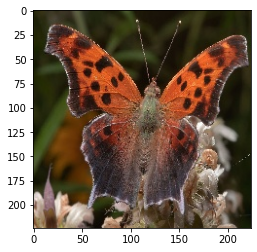

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['BANDED PEACOCK']
Predicted:  ['BANDED PEACOCK']


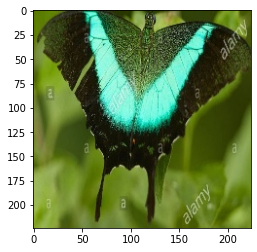

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['BROWN SIPROETA']
Predicted:  ['BROWN SIPROETA']


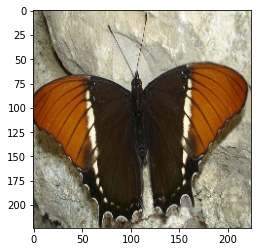

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['PINE WHITE']
Predicted:  ['PINE WHITE']


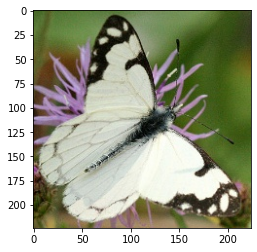

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['CLOUDED SULPHUR']
Predicted:  ['CLOUDED SULPHUR']


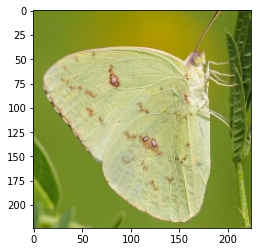

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['LARGE MARBLE']
Predicted:  ['LARGE MARBLE']


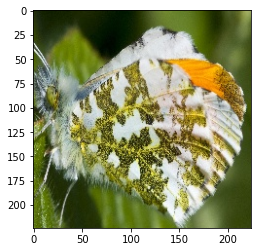

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['LARGE MARBLE']
Predicted:  ['LARGE MARBLE']


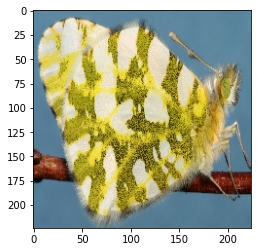

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['STRAITED QUEEN']
Predicted:  ['STRAITED QUEEN']


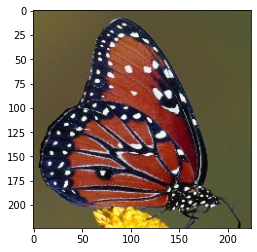

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['BLACK HAIRSTREAK']
Predicted:  ['BLACK HAIRSTREAK']


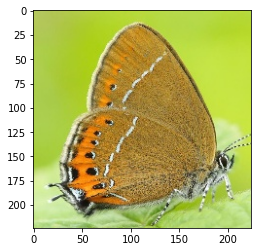

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['SOOTYWING']
Predicted:  ['SOOTYWING']


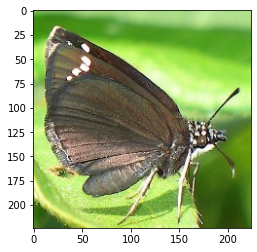

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['BLUE SPOTTED CROW']
Predicted:  ['BLUE SPOTTED CROW']


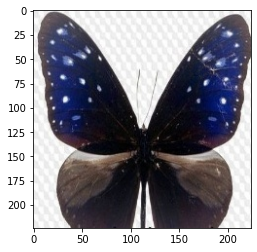

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['ELBOWED PIERROT']
Predicted:  ['ELBOWED PIERROT']


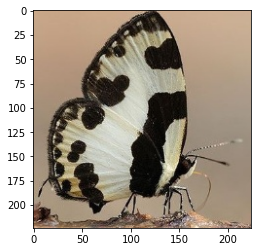

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['SLEEPY ORANGE']
Predicted:  ['SLEEPY ORANGE']


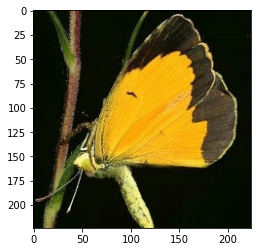

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['TWO BARRED FLASHER']
Predicted:  ['TWO BARRED FLASHER']


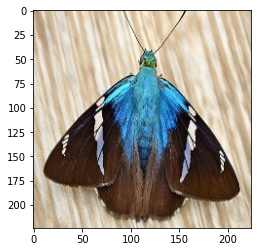

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['SCARCE SWALLOW']
Predicted:  ['SCARCE SWALLOW']


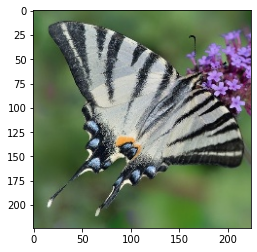

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['CLEOPATRA']
Predicted:  ['SLEEPY ORANGE']


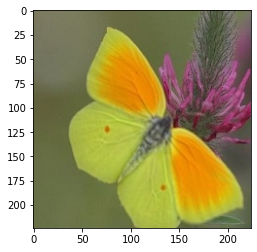

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['PEACOCK']
Predicted:  ['PEACOCK']


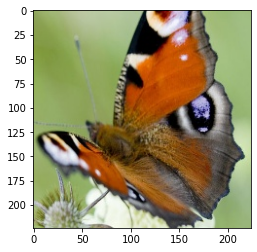

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['GREAT JAY']
Predicted:  ['GREAT JAY']


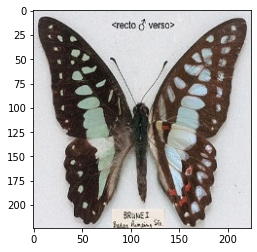

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['STRAITED QUEEN']
Predicted:  ['STRAITED QUEEN']


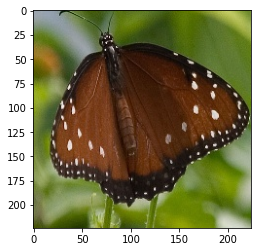

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

Actual:  ['JULIA']
Predicted:  ['JULIA']


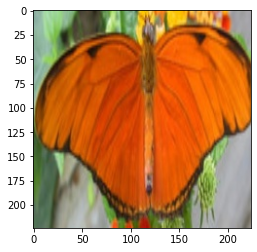

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



In [ ]:
for i in range(20):
  pred = np.argmax(predictions[i])
  predd = le.inverse_transform([pred])

  actual = y_test[i]
  actual = le.inverse_transform([actual])

  img = cv2.cvtColor(x_test[i], cv2.COLOR_BGR2RGB)
  im_pil = Image.fromarray(img)

  print('Actual: ', actual)
  print('Predicted: ', predd)
  plt.imshow(im_pil)
  plt.show()
  print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
  print()